# **Análise de Dados de um dataset da Área de Varejo**

O objetivo é responder perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### **Carregando os Dados**

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(9700, 11)

In [4]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### **Análise Exploratória**

In [5]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [6]:
# Verifica o tipo de dado de cada coluna
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Resumo estatístico da coluna 'Valor_Venda'
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [8]:
# Verifica se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [9]:
# Verifica de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### **Pergunta 1:** <br>Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [10]:
# Filtrar o dataframe com os registros da categoria
df1 = df[df['Categoria'] == 'Office Supplies']

In [11]:
# Agrupar por cidade e calcular o total de Valor_Venda
df1_total = df1.groupby('Cidade')['Valor_Venda'].sum()

print("Cidade com maior valor de venda para 'Office Supplies':", df1_total.idxmax())  # Cidade com maior valor de venda

Cidade com maior valor de venda para 'Office Supplies': New York City


In [12]:
# Conferindo o resultado de outra maneira, através da ordenação dos valores
df1_total.sort_values(ascending=False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

### **Pergunta 2:** <br>Qual o Valor Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [13]:
# Calcula o total de vendas para cada data de pedido
df2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()
df2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

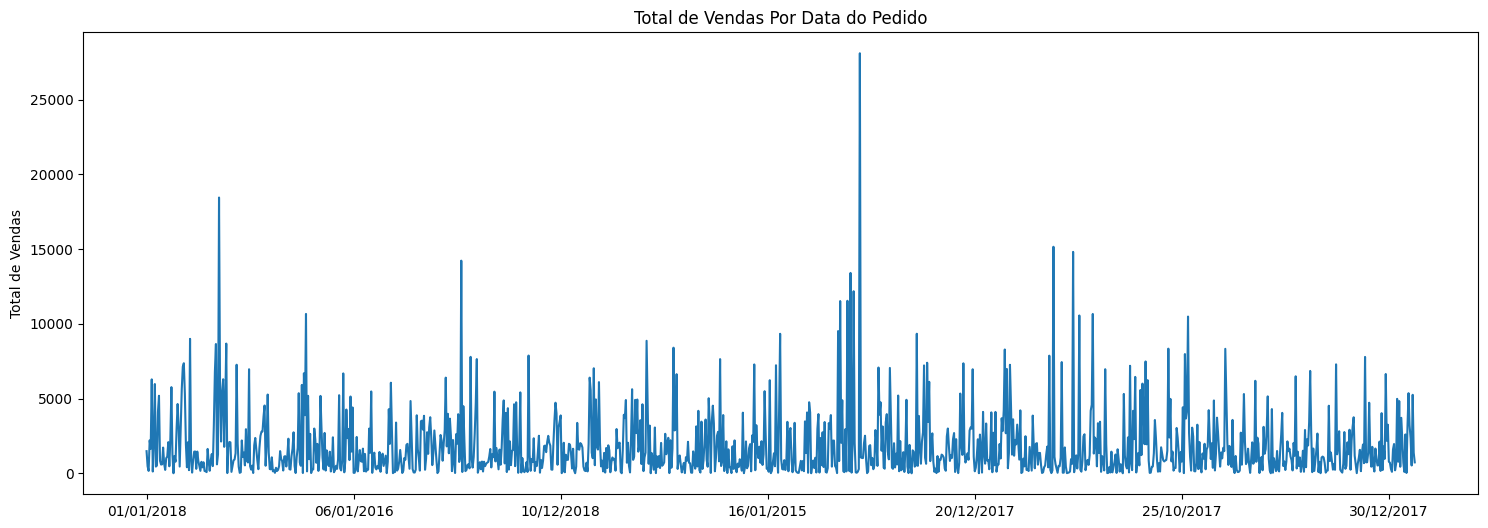

In [14]:
plt.figure(figsize = (18, 6))
df2.plot(x='Data_Pedido', y='Valor_Venda')
plt.title('Total de Vendas Por Data do Pedido')
plt.xlabel('')
plt.ylabel('Total de Vendas')
plt.show()

### **Pergunta 3:** <br>Qual o Valor Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [15]:
# Agrupa por estado e calcula o total de vendas
df3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
df3.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


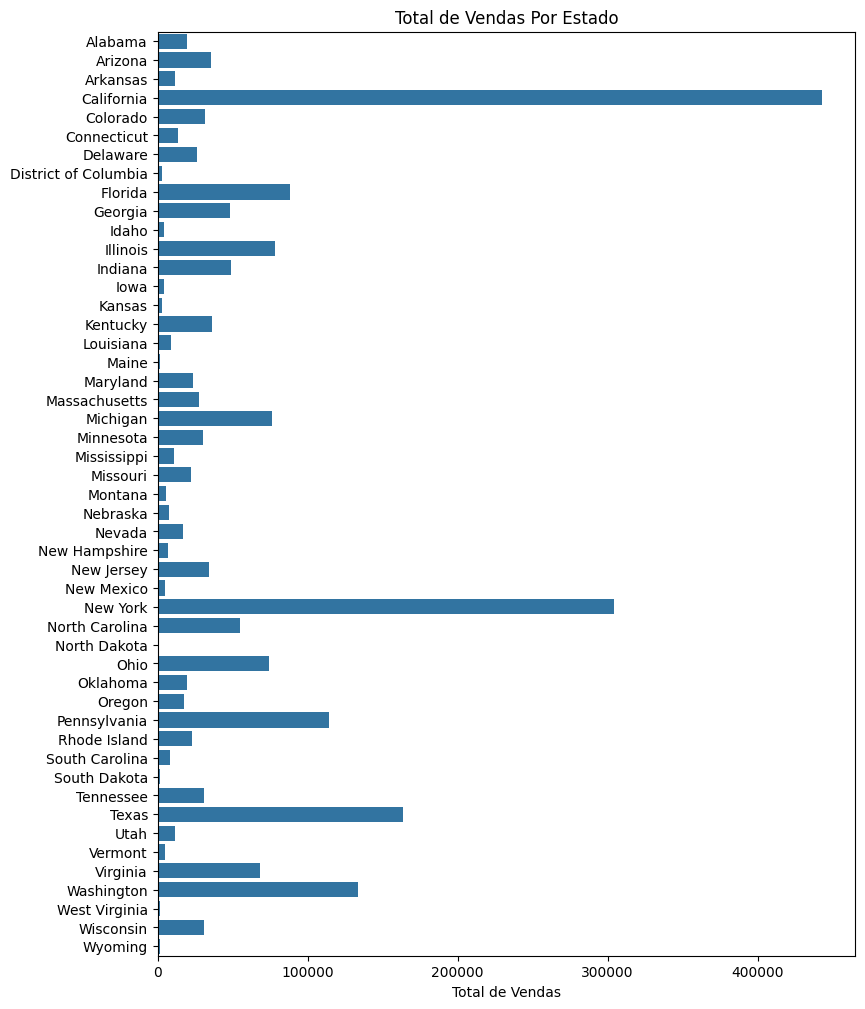

In [16]:
plt.figure(figsize = (9, 12))

# Ordenando o DataFrame pela coluna 'Valor_Venda' de forma decrescente
# df3_sorted = df3.sort_values(by='Valor_Venda', ascending=False)
# sns.barplot(data=df3_sorted, x='Valor_Venda', y='Estado')

sns.barplot(data=df3, x='Valor_Venda', y='Estado')
plt.title('Total de Vendas Por Estado')
plt.xlabel('Total de Vendas')
plt.ylabel('')
plt.show()

### **Pergunta 4:** <br>Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [17]:
# Agrupa por cidade, calcula o total de vendas e ordena listando somente os 10 primeiros registros
df4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(10)
df4.head(15)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


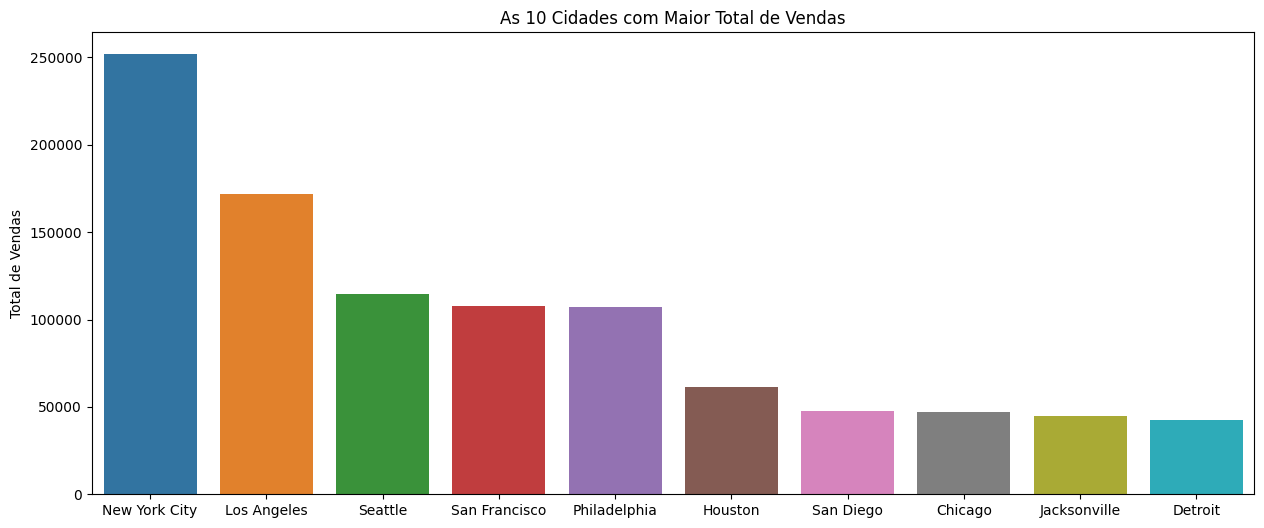

In [18]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df4, y='Valor_Venda', x='Cidade', hue='Cidade')
plt.title('As 10 Cidades com Maior Total de Vendas')
plt.ylabel('Total de Vendas')
plt.xlabel('')
plt.show()

### **Pergunta 5:** <br>Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [19]:
# Agrupa por segmento e calcula o total de vendas
df5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()
df5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [20]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values)  # Soma os valores totais
        val = int(round(pct * total / 100.0))  # Converte o percentual em valor absoluto
        return '$ {v:d}'.format(v=val)  # Formata o valor para exibição com o símbolo '$'
    return my_format  # Retorna a função de formatação

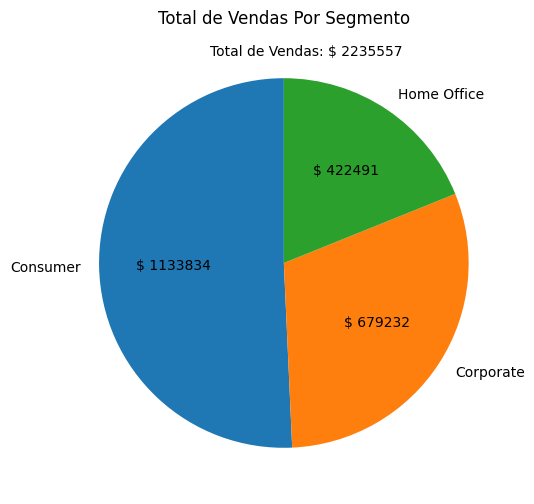

In [21]:
plt.figure(figsize=(6, 6))
plt.pie(df5['Valor_Venda'], 
        labels = df5['Segmento'],
        autopct = autopct_format(df5['Valor_Venda']),
        startangle = 90)
# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df5['Valor_Venda']))), xy = (-0.4, 1.12))
plt.title('Total de Vendas Por Segmento')
plt.show()

### **Pergunta 6:** <br>Qual o Total de Vendas Por Segmento e Ano?

In [22]:
# Converte a coluna de data para o tipo datetime (formato adequado)
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

# Extrai o ano e cria uma nova coluna
df['Ano'] = df['Data_Pedido'].dt.year

In [23]:
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
Ano                      int32
dtype: object

In [24]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [25]:
# Agrupa por segmento e por ano, calculando o total de vendas
df6 = df.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum()
df6

Segmento     Ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

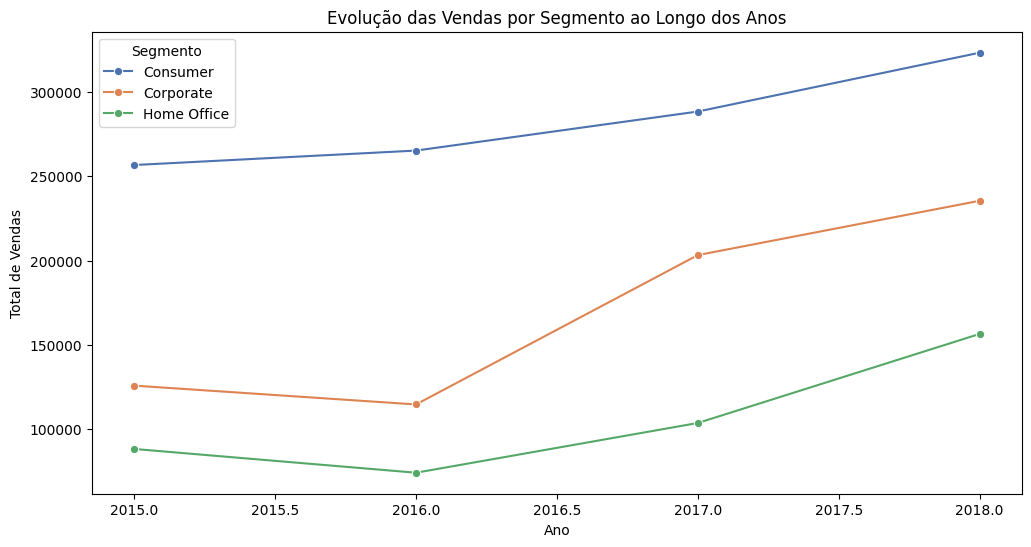

In [26]:
# Reseta o índice para tornar 'Segmento' e 'Ano' colunas
# df6 = df6.reset_index()

# Gráfico de linhas para a evolução das vendas por segmento ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df6.reset_index(), x='Ano', y='Valor_Venda', hue='Segmento', palette='deep', marker='o')
plt.title('Evolução das Vendas por Segmento ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.legend(title='Segmento')
plt.show()

### **Pergunta 7:** 

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [27]:
# Considerando a próxima pergunta, a abordagem será de criar uma nova coluna
# Cria uma nova coluna de acordo com a regra definida acima
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [28]:
df['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [29]:
print(f'{df[df['Desconto'] == 0.15]['Desconto'].count()} vendas receberiam 15% de desconto.')

457 vendas receberiam 15% de desconto.


### **Pergunta 8:** <br>Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [30]:
# Calcula a média dos valores disponíveis para o desconto de 15%
media_antes = df[df['Desconto'] == 0.15]['Valor_Venda'].mean()

# Localiza os valores disponíveis para o desconto de 15% e aplica o desconto
df_depois_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda'] * 0.85
media_depois = df_depois_desconto.mean()    # Calcula a média

In [31]:
print(f'Média das vendas antes do desconto: {media_antes:.2f}')
print(f'Média das vendas depois do desconto: {media_depois:.2f}')

Média das vendas antes do desconto: 2116.81
Média das vendas depois do desconto: 1799.29


### **Pergunta 9:** <br>Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [32]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [33]:
# Extrai o mês e cria uma nova coluna
df['Mes'] = df['Data_Pedido'].dt.month
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,10


In [ ]:
# Agrupa por segmento, ano e mês, calculando a média de vendas
df9 = df.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.mean])
df9

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12736\1690277927.py:2: FutureWarning: The provided callable <function mean at 0x000001FE23CAD4E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df9 = df.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.mean, np.sum])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12736\1690277927.py:2: FutureWarning: The provided callable <function sum at 0x000001FE23CAC0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df9 = df.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.mean, np.sum])


mean        sum
Segmento    Ano  Mes                       
Consumer    2015 1    146.736787   6896.629
                 2    117.327926   3167.854
                 3    152.170564  11869.304
                 4    189.762750   9108.612
                 5    191.337439  12628.271
...                          ...        ...
Home Office 2018 8    176.160606   5813.300
                 9    249.140597  19183.826
                 10   412.576597  29705.515
                 11   247.519423  24009.384
                 12   224.523983  13022.391

[144 rows x 2 columns]

In [35]:
plt.figure(figsize = (12, 6))
fig = sns.relplot(kind='line', data=df9, x='Mes', y='mean', hue='Segmento', palette='deep', col='Ano', col_wrap=2)
fig.set_axis_labels('Mês', 'Média de Vendas')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1200x600 with 0 Axes>

### **Pergunta 10:** <br>Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [ ]:
# Agrupa por categoria e subcategoria e calcula a soma somente para variáveus numéricas
df10 = df.groupby(['Categoria', 'SubCategoria']).sum(numeric_only=True).sort_values(by='Valor_Venda', ascending=False).head(12)

# Converte a coluna Valor_Venda em número inteiro e classifica por categoria
df10 = df10[['Valor_Venda']].astype(int).sort_values(by='Categoria').reset_index()
df10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [ ]:
# Outro dataframe somente com os totais por categoria
df10_categoria = df10.groupby('Categoria').sum(numeric_only = True).reset_index()
df10_categoria

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [ ]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

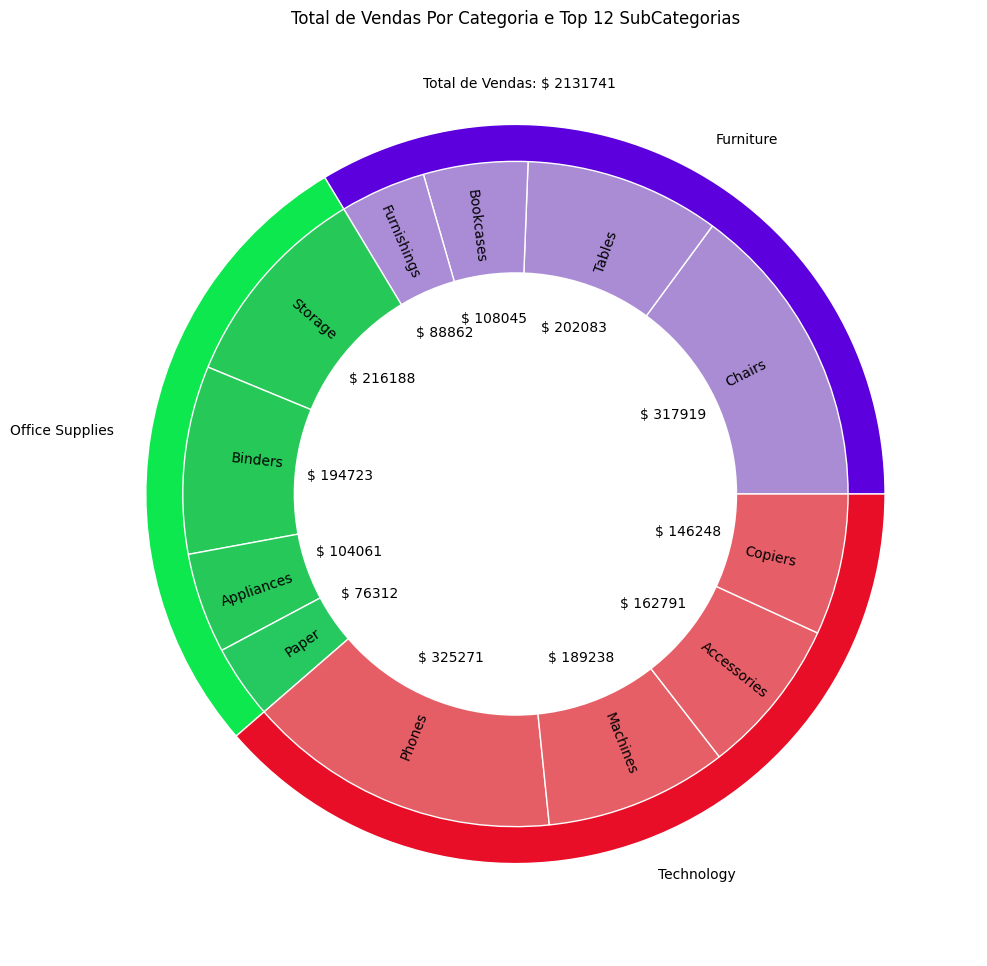

In [ ]:
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df10_categoria['Valor_Venda'], 
            radius = 1,
            labels = df10_categoria['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df10['Valor_Venda'],
            radius = 0.9,
            labels = df10['SubCategoria'],
            autopct = autopct_format(df10['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df10['Valor_Venda']))), xy = (-0.25, 1.1))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()